In [1]:
# Valeria Pérez Cong
## 17 de octubre 2019 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
sqlContext 

Out[ 2 ]: <pyspark.sql.context.SQLContext at 0x7f408a3566d8>

## Datos
Primero cargamos el csv a un bucket de aws y después lo montamos al DBFS de databricks para poder leerlo como si fuera un file local y hacer los queries. 

Este notebook se exportó desde databricks.

In [5]:
AWS_BUCKET_NAME = "examen-opi"
MOUNT_NAME = "a"
dbutils.fs.mount("s3a://%s" % AWS_BUCKET_NAME, "/mnt/%s" % MOUNT_NAME)
display(dbutils.fs.ls("/mnt/%s" % MOUNT_NAME))


--------------------------------------------------------------------------- 
 ExecutionError Traceback (most recent call last)
 <command-3561875710569963> in <module> () 
 1 AWS_BUCKET_NAME = "examen-opi" 
 2 MOUNT_NAME = "a" 
 ----> 3 dbutils . fs . mount ( "s3a://%s" % AWS_BUCKET_NAME , "/mnt/%s" % MOUNT_NAME ) 
 4 display ( dbutils . fs . ls ( "/mnt/%s" % MOUNT_NAME ) ) 

 /local_disk0/tmp/1571476171489-0/dbutils.py in f_with_exception_handling (*args, **kwargs) 
 306 exc . __context__ = None 
 307 exc . __cause__ = None 
 --> 308 raise exc 
 309 return f_with_exception_handling 
 310 

 ExecutionError : An error occurred while calling o311.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/a; nested exception is: 
	java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/a
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:123)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:63)
	at com.databricks.backend.daemon.dbutils.DBUtilsCore.mount(DBUtilsCore.scala:465)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/a
	at scala.Predef$.require(Predef.scala:281)
	at com.databricks.backend.daemon.data.server.DefaultMetadataManager.$anonfun$insertMount$1(MetadataManager.scala:205)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.backend.daemon.data.server.DefaultMetadataManager.withRetries(MetadataManager.scala:307)
	at com.databricks.backend.daemon.data.server.DefaultMetadataManager.insertMount(MetadataManager.scala:201)
	at com.databricks.backend.daemon.data.server.handler.MountHandler.receive(MountHandler.scala:79)
	at com.databricks.backend.daemon.data.server.session.SessionContext.$anonfun$queryHandlers$1(SessionContext.scala:103)
	at com.databricks.backend.daemon.data.server.session.SessionContext.$anonfun$queryHandlers$1$adapted(SessionContext.scala:102)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at com.databricks.backend.daemon.data.server.session.SessionContext.queryHandlers(SessionContext.scala:102)
	at com.databricks.backend.daemon.data.server.DbfsServerBackend$$anonfun$receive$3.applyOrElse(DbfsServerBackend.scala:298)
	at com.databricks.backend.daemon.data.server.DbfsServerBackend$$anonfun$receive$3.applyOrElse(DbfsServerBackend.scala:276)
	at com.databricks.rpc.ServerBackend.$anonfun$internalReceive$2(ServerBackend.scala:44)
	at com.databricks.rpc.ServerBackend$$anonfun$commonReceive$1.applyOrElse(ServerBackend.scala:61)
	at com.databricks.rpc.ServerBackend$$anonfun$commonReceive$1.applyOrElse(ServerBackend.scala:61)
	at com.databricks.rpc.ServerBackend.$anonfun$internalReceive$1(ServerBackend.scala:40)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$4(UsageLogging.scala:405)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:235)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:230)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:227)
	at com.databricks.rpc.Serv

### Leemos el csv

In [7]:
df = spark.read.format("csv").option("header", "true").load("/mnt/%s/load/all_data.csv" % MOUNT_NAME)


## Procesamiento de datos

### Pregunta 1.a 

In [9]:
## 1.a
## número de registos
df.count()

Out[ 7 ]: 62530715

In [10]:
# columnas
df.columns

Out[ 8 ]: ['producto',
 'presentacion',
 'marca',
 'categoria',
 'catalogo',
 'precio',
 'fechaRegistro',
 'cadenaComercial',
 'giro',
 'nombreComercial',
 'direccion',
 'estado',
 'municipio',
 'latitud',
 'longitud']

In [11]:
## dtypes de las columnas
df.dtypes

Out[ 9 ]: [('producto', 'string'),
 ('presentacion', 'string'),
 ('marca', 'string'),
 ('categoria', 'string'),
 ('catalogo', 'string'),
 ('precio', 'string'),
 ('fechaRegistro', 'string'),
 ('cadenaComercial', 'string'),
 ('giro', 'string'),
 ('nombreComercial', 'string'),
 ('direccion', 'string'),
 ('estado', 'string'),
 ('municipio', 'string'),
 ('latitud', 'string'),
 ('longitud', 'string')]

In [12]:
df.head()

Out[ 41 ]: Row(producto='CUADERNO FORMA ITALIANA', presentacion='96 HOJAS PASTA DURA. CUADRICULA CHICA', marca='ESTRELLA', categoria='MATERIAL ESCOLAR', catalogo='UTILES ESCOLARES', precio='25.9', fechaRegistro='2011-05-18 00:00:00.000', cadenaComercial='ABASTECEDORA LUMEN', giro='PAPELERIAS', nombreComercial='ABASTECEDORA LUMEN SUCURSAL VILLA COAPA', direccion='CANNES No. 6 ESQ. CANAL DE MIRAMONTES', estado='DISTRITO FEDERAL', municipio='TLALPAN ', latitud='19.29699', longitud='-99.125417')

In [13]:
# creamos tabla temporal para que los queries sean más bonitos
df.registerTempTable("profeco")

### Pregunta 1b

In [14]:
# 1.b 
display(
sqlContext.sql("""
                           SELECT COUNT(DISTINCT categoria)
                           FROM profeco
                           """)
)

count(DISTINCT categoria)
41


### Pregunta 1c

In [15]:
# 1.c - cadenas comerciales monitoreadas
display(
sqlContext.sql("""
                           SELECT COUNT(DISTINCT cadenaComercial)
                           FROM profeco
                           """)
)

count(DISTINCT cadenaComercial)
705


### Pregunta 1d 

Creo que una buena forma de medir la calidad es contar el número de valores nulos, o bien, checar la cardinalidad de las variables (columnas) para ver si no hay dos valores que digan lo mismo, por ejemplo una variable que me parece particularme interesante es la marca y si la exploramos vemos esto: 

In [17]:
display(
sqlContext.sql("""

select marca, count(*) as conteo, count(*) / (select count(*) from profeco) as prop
from profeco
group by marca
order by conteo desc
limit 10


                           """)
)

marca,conteo,prop
S/M,19814738,0.31688008045326205
SIN MARCA,1304324,0.020858933085924253
LA COSTENA,1156782,0.01849942064471836
LG,838718,0.01341289636620979
SAMSUNG,729047,0.01165902229008576
MC CORMICK,632432,0.010113941604537866
MABE,631119,0.010092943923638168
OSTER,540629,0.008645815100626947
SONY,509779,0.008152457556258551
GAMESA,449320,0.007185588714282253


Podemos ver que más del 30% de la tabla tiene un valor s/m o sin marca para la variable de marca

In [19]:
display(
sqlContext.sql("""
select count(*) as productos_nulos
from profeco
where producto is null
                           """)
)

productos_nulos
0


No hay productos nulos

In [20]:
display(
sqlContext.sql("""
select count(*) as precio_nulos
from profeco
where precio is null
                           """)
)

precio_nulos
0


No hay precios nulos

In [21]:
display(
sqlContext.sql("""
select count(*) as comercio_nulos
from profeco
where cadenaComercial is null
                           """)
)

comercio_nulos
1184


Por otro lado, si consideramos producto y precio como las variables más importantes,y ninguna tiene valor nulo, esto quiere que al menos la información "core" está correctamente registrada. 

Como mencioné en la pregunta A, la calidad de los datos depende de la pregunta que buscamos contestar

### Pregunta 1.e. productos más monitoreados por entidad


In [24]:
display(
sqlContext.sql("""
         with conteo_gral as(
               select estado, producto, count(*) as conteo
                from profeco 
                group by estado, producto
                order by conteo desc
          ),
          conteo_max as( 
          select estado, max(conteo) as max
          from conteo_gral
          group by estado 
          )
           select conteo_max.estado, producto, conteo
           from conteo_gral inner join conteo_max
           on conteo_gral.estado = conteo_max.estado AND conteo_gral.conteo = conteo_max.max          
                           """)
)

estado,producto,conteo
SONORA,REFRESCO,34731
VERACRUZ DE IGNACIO DE LA LLAVE,REFRESCO,14576
QUINTANA ROO,FUD,34846
BAJA CALIFORNIA,REFRESCO,37243
ZACATECAS,DETERGENTE P/ROPA,20884
SAN LUIS POTOSÍ,FUD,10164
OAXACA,LECHE ULTRAPASTEURIZADA,18078
COL. EDUARDO GUERRA,REFRESCO,275
estado,producto,20
MORELOS,REFRESCO,9632


### Pregunta 1.f - cadena comercial con mayor variedad de productos monitoreados

In [25]:
## 1.f - cadena comercial con mayor variedad de productos monitoreados

display(
sqlContext.sql("""
      select cadenaComercial, count(distinct producto) as variedad_productos
      from profeco
      group by cadenaComercial
      order by variedad_productos desc
             
                           """)
)

cadenaComercial,variedad_productos
SORIANA,1059
WAL-MART,1051
MEGA COMERCIAL MEXICANA,1049
COMERCIAL MEXICANA,1036
CHEDRAUI,1026
MERCADO SORIANA,1024
BODEGA AURRERA,1012
HIPERMERCADO SORIANA,1006
H.E.B.,1001
SORIANA PLUS,999


## Análisis exploratorio

### Pregunta 2.a canasta básica que permita comparar precios geográfica y temporalmente



De acuerdo a este [link](http://elinpc.com.mx/canasta-basica-mexicana/): 
  
"La canasta básica es un conjunto de bienes y servicios indispensables para que una familia pueda satisfacer sus necesidades básicas de consumo a partir de su ingreso."

"Para determinar el contenido final en la canasta básica, se toman en cuenta familias promedio, ingresos y encuestas. La Encuesta Ingreso-Gasto de los Hogares (ENIGH) emitida por el INEGI proporciona los gastos asociados de los hogares en 580 bienes y servicios."

"En base a esto, el Banco de México seleccionaba ciertos productos y servicios y los integraba en una canasta básica, al final calcula el peso de cada uno en la construcción del INPC, esta acción recibe el nombre de ponderación. Actualmente el INEGI es el encargado de realizar toda la operación."

Entonces, creo que requiero mucha más información y contexto del problema para poder generar una canasta básica. Sin embargo creo que una buena forma de atacar el problema es ver cuáles son los productos con más registros por mes y estado. 



In [28]:
display(
sqlContext.sql("""
      select count(distinct producto) as productos_distintos
      from profeco
                           """)
)

productos_distintos
1107


In [29]:
display(
sqlContext.sql("""
      with conteo_estados as(
          select producto, count(distinct estado) as estados_present
          from profeco
          group by producto
          order by estados_present desc 
          
      ), conteo_registros as(
          select producto, count(distinct fechaRegistro) as registros
          from profeco
          group by producto
          order by registros desc
      ) 
      select conteo_estados.producto, estados_present, registros
      from conteo_estados inner join conteo_registros
      on conteo_estados.producto = conteo_registros.producto
      order by registros, estados_present desc
                           """)
)

producto,estados_present,registros
SALSA DE CHILE,1,1
BISTEC DEL 7,1,1
TORTA IMPERIAL,1,1
producto,1,1
ONICIT,1,3
POLVORON,2,5
VERDILLO,1,5
PAPAS Y SIMILARES,8,7
RIOJANO,2,8
LIZETA,1,9


Entonces, si nos vamos al final de la tabla podemos ver que los productos ARROZ, SARDINA, ACONDICIONADOR Y ENJUAGE, ACONDICIONADOR DE TELAS, TORTILLA DE HARINA DE TRIGO, ALPINO, CIALIS son los productos con mayor número de registros y presentes en todos los estados. Con estos productos iniciaría para mi canasta básica. 

### Pregunta 2.b 

In [31]:
# 2.b ciudad más cara del país y la más barata
# precio promedio por estado, los municipios son mucho más específicos
# y no todos pueden considerarse como ciudades 

display(
sqlContext.sql("""
          select estado, avg(cast(precio as float)) as precio_promedio
          from profeco
          group by estado
          order by precio_promedio desc
                           """)
)

estado,precio_promedio
HIDALGO,834.2184101102062
DURANGO,814.5400373523249
SAN LUIS POTOSÍ,752.664526972986
CAMPECHE,734.6088549119725
NAYARIT,730.7130878728536
QUINTANA ROO,711.7065111700188
TABASCO,710.0588436794137
COLIMA,696.8027222255952
PUEBLA,681.5476859679271
BAJA CALIFORNIA SUR,674.8786398073177


Por facilidad, vamos a calcular el precio promedio por estado como aproximación a buscar cuál es la ciudad más barata y cuál es la más cara. Decidimos usar estado y no municipio porque hay muchos municipios que no podrían considerarse como ciudad. Vemos que el estado más caro es Hidalgo y el estado más barato es el Distrito Federal. 

Es muy posible que los estados más baratos o más caros cambien según el producto. 

### Pregunta 2.c

In [33]:
# 2.c hay algún patro estacional entre años
# TO_DATE(CAST(UNIX_TIMESTAMP('08/26/2016', 'MM/dd/yyyy') AS TIMESTAMP)) AS newdate
registros_fecha = spark.sql("""
          select to_date(cast(fechaRegistro as timestamp)) as date, count(*) as registros
          from profeco
          group by date
        """)

registros_fecha.registerTempTable("registros_fecha")

In [34]:
display(
sqlContext.sql("""
                           SELECT extract(year from date) as year, 
                           extract(month from date) as month, 
                           sum(registros) as registros
                           FROM registros_fecha
                           GROUP BY year, month
                           """)
)

year,month,registros
2012,10,888932
2015,2,1187827
2014,4,762835
2015,12,1420173
2012,8,924176
2013,2,762116
2012,12,840283
2012,4,723632
null,null,20
2014,10,1316682


In [35]:
registros_mensuales = sqlContext.sql("""
                           SELECT extract(year from date) as year, 
                           extract(month from date) as month, 
                           sum(registros) as registros
                           FROM registros_fecha
                           GROUP BY year, month
                           """)


In [36]:
registros_mensuales.registerTempTable("registros_mensuales")

In [37]:
registros_mensuales_df = pd.DataFrame(registros_mensuales.toPandas())
registros_mensuales_df.head()

,year,month,registros
0,2012.0,10.0,888932
1,2015.0,2.0,1187827
2,2014.0,4.0,762835
3,2015.0,12.0,1420173
4,2012.0,8.0,924176


In [38]:
registros_mensuales_df = registros_mensuales_df.sort_values(by=['year', 'month']).reset_index()
#registros_mensuales_df = registros_mensuales_df.drop(columns = ['index'])
registros_mensuales_df

,index,year,month,registros
0,59,2011.0,1.0,628380
1,25,2011.0,2.0,575118
2,17,2011.0,3.0,679647
3,26,2011.0,4.0,609948
4,37,2011.0,5.0,646121
5,45,2011.0,6.0,778947
6,39,2011.0,7.0,740513
7,29,2011.0,8.0,801032
8,62,2011.0,9.0,609180
9,54,2011.0,10.0,578839


In [39]:
registros_mensuales_df.rename(columns = {'index':'nu'}, inplace = True)
registros_mensuales_df.head(2)

,nu,year,month,registros
0,59,2011.0,1.0,628380
1,25,2011.0,2.0,575118


In [40]:
registros_mensuales_df_a = registros_mensuales_df.reset_index()
registros_mensuales_df_a.head()

,index,nu,year,month,registros
0,0,59,2011.0,1.0,628380
1,1,25,2011.0,2.0,575118
2,2,17,2011.0,3.0,679647
3,3,26,2011.0,4.0,609948
4,4,37,2011.0,5.0,646121


In [41]:
#registros_mensuales_df_a.loc[0, 'registros']
registros_mensuales_df_a = registros_mensuales_df_a[registros_mensuales_df_a.index < 64]
#registros_mensuales_df_a

In [42]:
registros_mensuales_df_a.groupby('year')['registros'].max()

Out[ 93 ]: year
2011.0 801032
2012.0 937622
2013.0 1006594
2014.0 1342025
2015.0 1679341
2016.0 2466698
Name: registros, dtype: int64

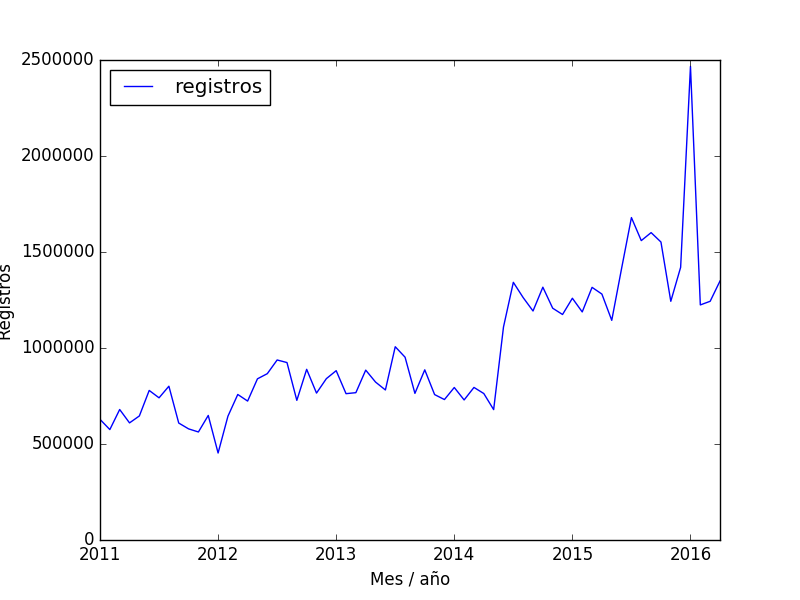

In [44]:
est_fig = registros_mensuales_df_a.plot.line(x = 'index', y = 'registros')
plt.xticks(range(0,61,12), ['2011', '2012', '2013','2014', '2015', '2016'])
plt.xlabel('Mes / año')
plt.ylabel('Registros')
display(est_fig.figure)

### Respuesta 2c y 2e


**2c**

Si consideramos el número de registros por mes en cada año podemos observar que el número de registros ha aumentado con el tiempo. Aunque no es muy evidente en algunos años (como en el 2013), podemos ver que el número de registros tiene un brinco en julio de casi todos los años (esto se observa del 2012 al 2015). En 2011 el pico se da en agosto y el 2016 lo descartamos pues solo hay observación de 4 meses. 
  
Como esta subida en el número de registros de en julio de cada año, podemos decir que el periodo estacional del número de registros por mes es de 12 meses.

**2e**

Creo que hacer un análisis de series de tiempo a nivel general (registros por mes) no sería concluyente porque ese no es el propósito de este conjunto de datos. Sería mucho más útil este análisis a un nivel mucho más desagregado, el principal riesgo es la alta cardinalidad de las variables por la forma de captura.

## Visualización de categorías y precio en León

In [46]:
# pregunta 3

display(
sqlContext.sql("""
                           SELECT municipio, count(*) as conteo
                           from profeco
                           where municipio like '%LEON%' OR
                           municipio like '%GUANAJUATO%'
                           group by municipio
                   
                           """)
)

municipio,conteo
LEON,1908469


In [47]:
# pregunta 3

display(
sqlContext.sql("""
                           SELECT distinct(estado)
                           from profeco
                           where municipio like '%LEON%' OR
                           municipio like '%GUANAJUATO%'                   
                           """)
)

estado
GUANAJUATO


In [48]:
# avg(cast(precio as float)) as precio_promedio
display(
sqlContext.sql("""
                           SELECT categoria, min(cast(precio as float)) as precio_min,
                           avg(cast(precio as float)) as precio_prom,
                           max(cast(precio as float)) as precio_max
                           from profeco
                           where municipio like '%LEON%'
                           group by categoria
                   
                           """)
)

categoria,precio_min,precio_prom,precio_max
MATERIAL ESCOLAR,2.8,45.45463657704959,424.0
ARTS. PARA EL CUIDADO PERSONAL,1.0,35.191717672172906,200.0
PESCADOS Y MARISCOS EN CONSERVA,2.0,18.021276001455675,190.0
UTENSILIOS DOMESTICOS,89.0,1268.6473939277053,5649.0
DETERGENTES Y PRODUCTOS SIMILARES,2.0,28.004186558473997,143.1
CARNE Y VISCERAS DE RES,7.0,88.92804054261289,360.0
PRODUCTOS DE TEMPORADA (NAVIDEÐOS),1.9,56.81156159235169,349.0
GALLETAS PASTAS Y HARINAS DE TRIGO,1.9,21.29918672862403,61.75
HORTALIZAS FRESCAS,0.45,17.343713318846493,150.0
DERIVADOS DE LECHE,1.0,44.57507571554146,172.8


In [49]:
# falta el mapa 

In [50]:
# columnas
df.columns

Out[ 26 ]: ['producto',
 'presentacion',
 'marca',
 'categoria',
 'catalogo',
 'precio',
 'fechaRegistro',
 'cadenaComercial',
 'giro',
 'nombreComercial',
 'direccion',
 'estado',
 'municipio',
 'latitud',
 'longitud']